In [1]:
from typing import Dict
from pathlib import Path
from text2sql_lib.result_metrics import LLMResultMetrics
from complexity_map import complexity_map
# ---------------------------------------------------------------------------
# create one metrics object per file
# ---------------------------------------------------------------------------
BENCH_DIR           = Path("better_benchmarks")
_SUFFIX             = ".jsonl"                 # all files end with this
metrics: Dict[str, LLMResultMetrics] = {}

for json_file in sorted(BENCH_DIR.glob(f"*{_SUFFIX}")):
    model_name  = json_file.stem                         # e.g. deepseek-r1-14b
    var_name    = model_name.replace("-", "_").replace(".", "_")           # python-valid identifier
    m           = LLMResultMetrics.from_jsonl(
        json_file,
        model_name=model_name,
        complexity_map=complexity_map,
    )
    metrics[var_name] = m
    globals()[var_name] = m     # optional: create variable in global scope

metrics["gpt_4_1"].open_source=False
metrics["gpt_4_1_mini"].open_source=False
metrics["gpt_4_1_nano"].open_source=False
metrics["o3"].open_source=False
metrics["o3"].reasoning=True
metrics["o3_mini"].open_source=False
metrics["o3_mini"].reasoning=True
metrics["o4_mini"].open_source=False
metrics["o4_mini"].reasoning=True
metrics["o4_mini_rag"].open_source=False
metrics["o4_mini_rag"].reasoning=True
metrics["qwen3_14b"].reasoning=True
metrics["deepseek_r1_14b"].reasoning=True
metrics["qwen3_30b_a3b"].reasoning=True

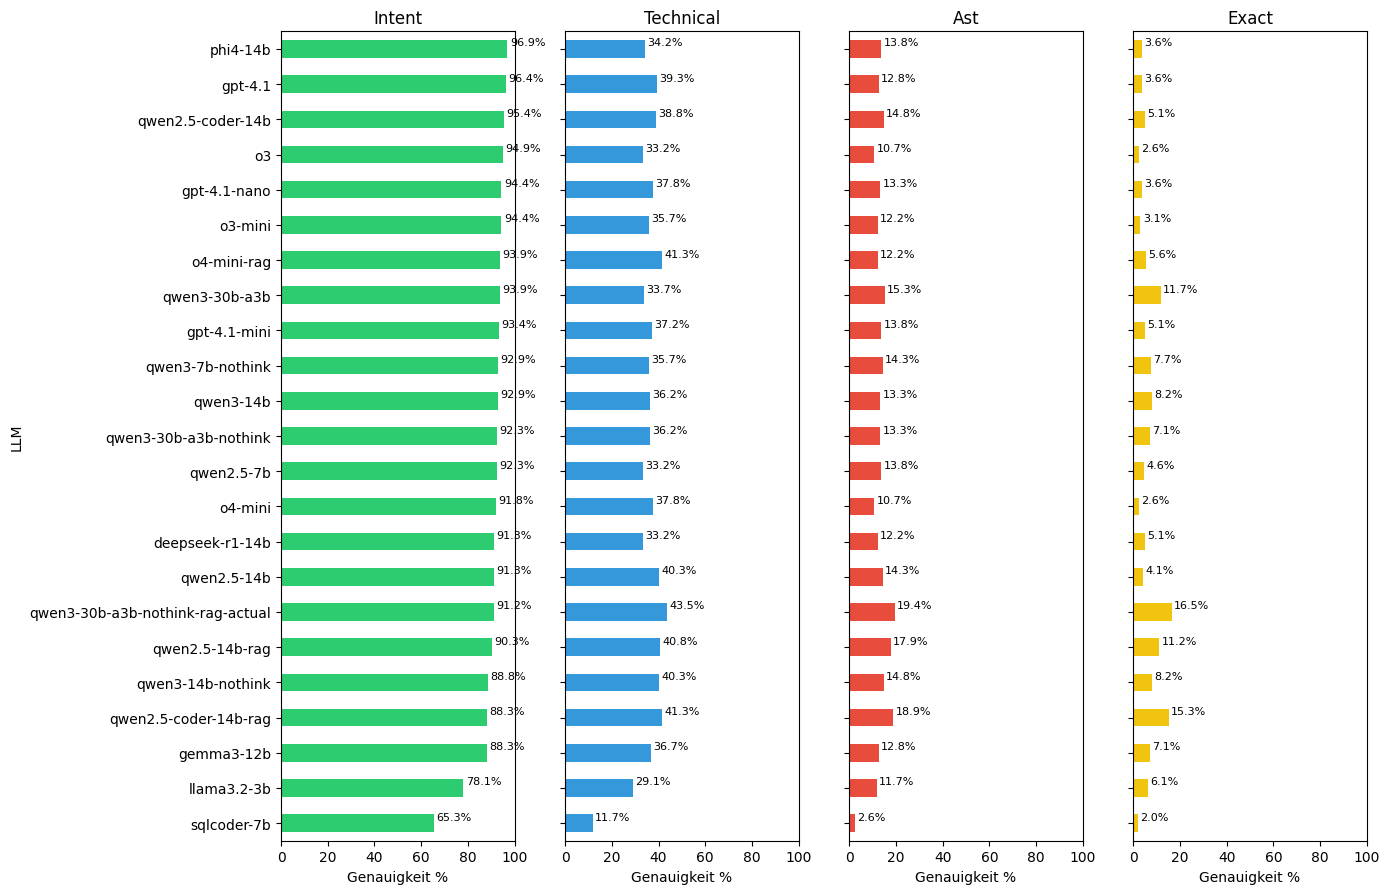

In [2]:
from text2sql_lib.viz_toolbox import *

plot_overall_multi(metrics)

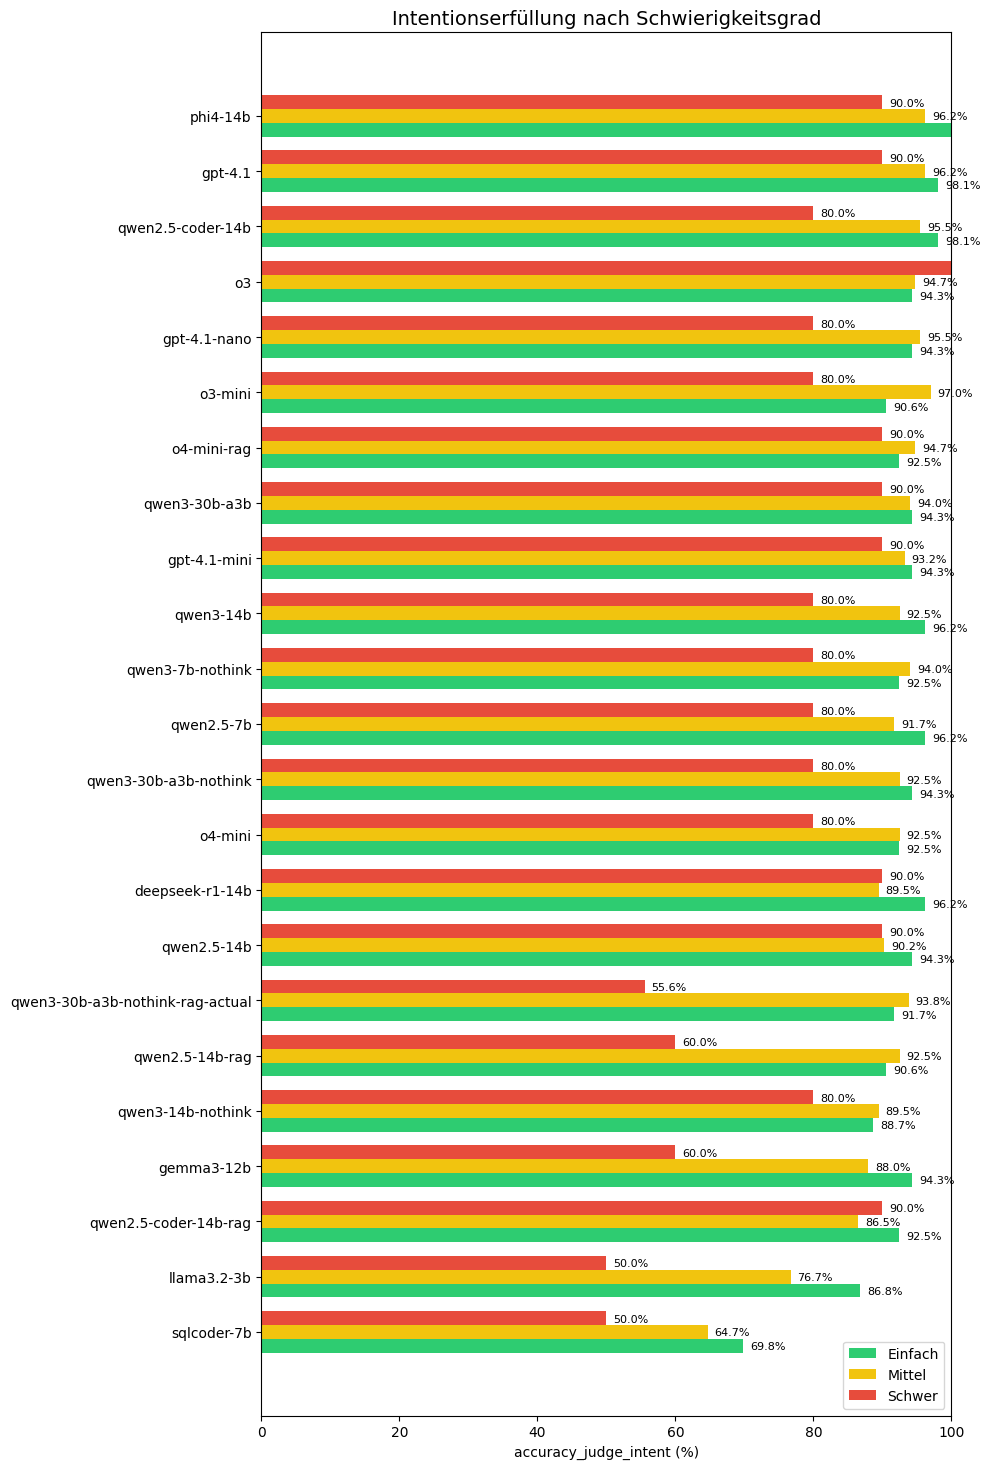

In [3]:
plot_difficulty_grouped(metrics, metric_fn_name="accuracy_judge_intent")

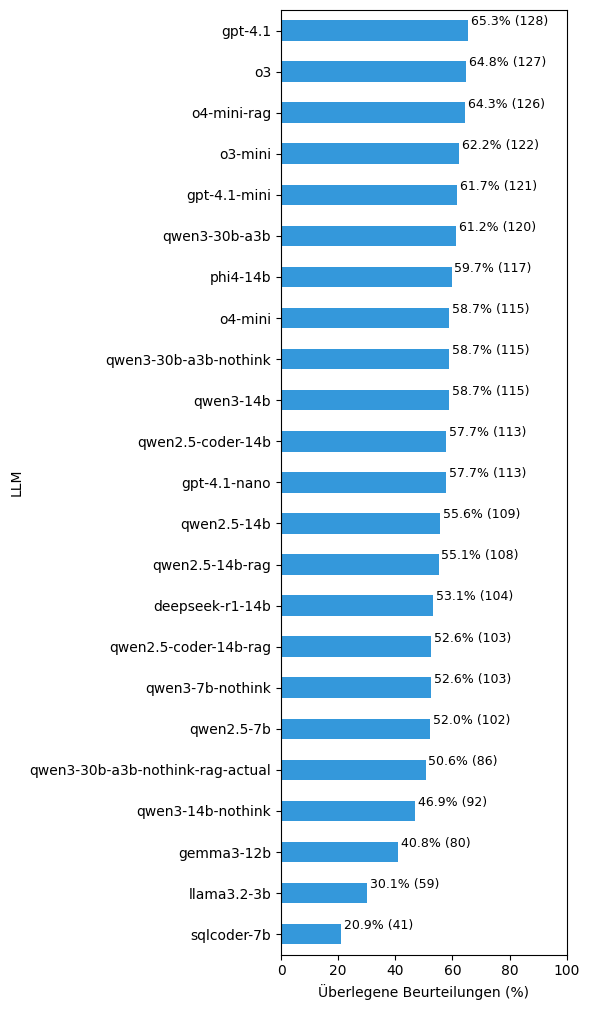

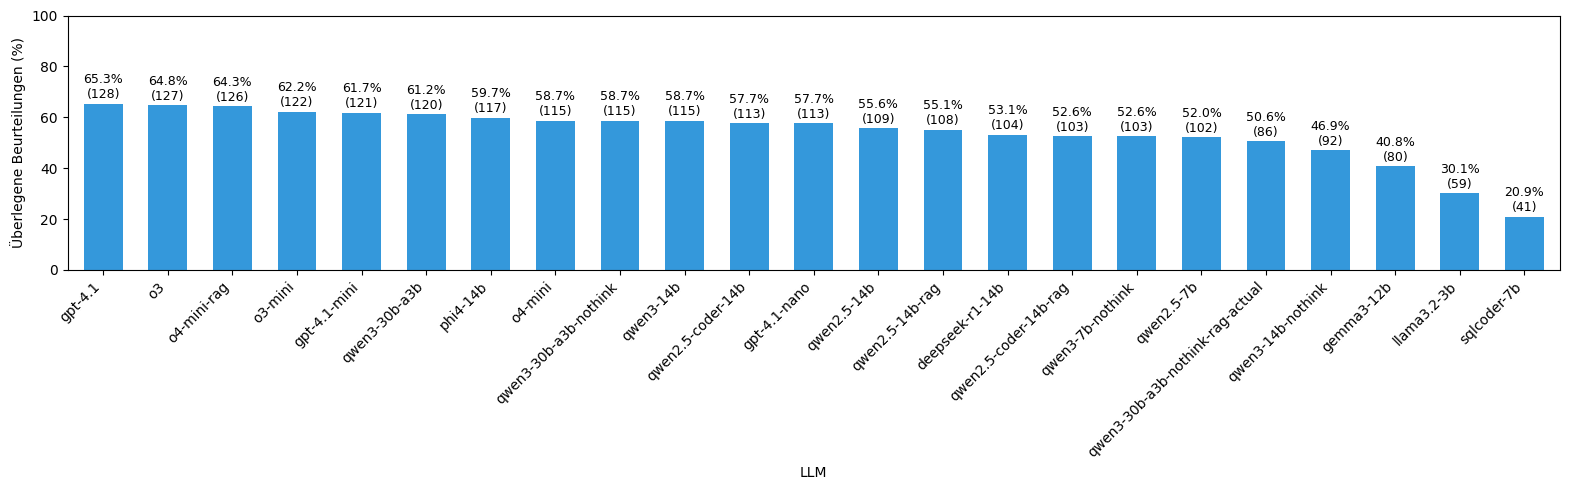

In [4]:
plot_superior(metrics, show_counts=True)
plot_superior_horizontal(metrics, show_counts=True)

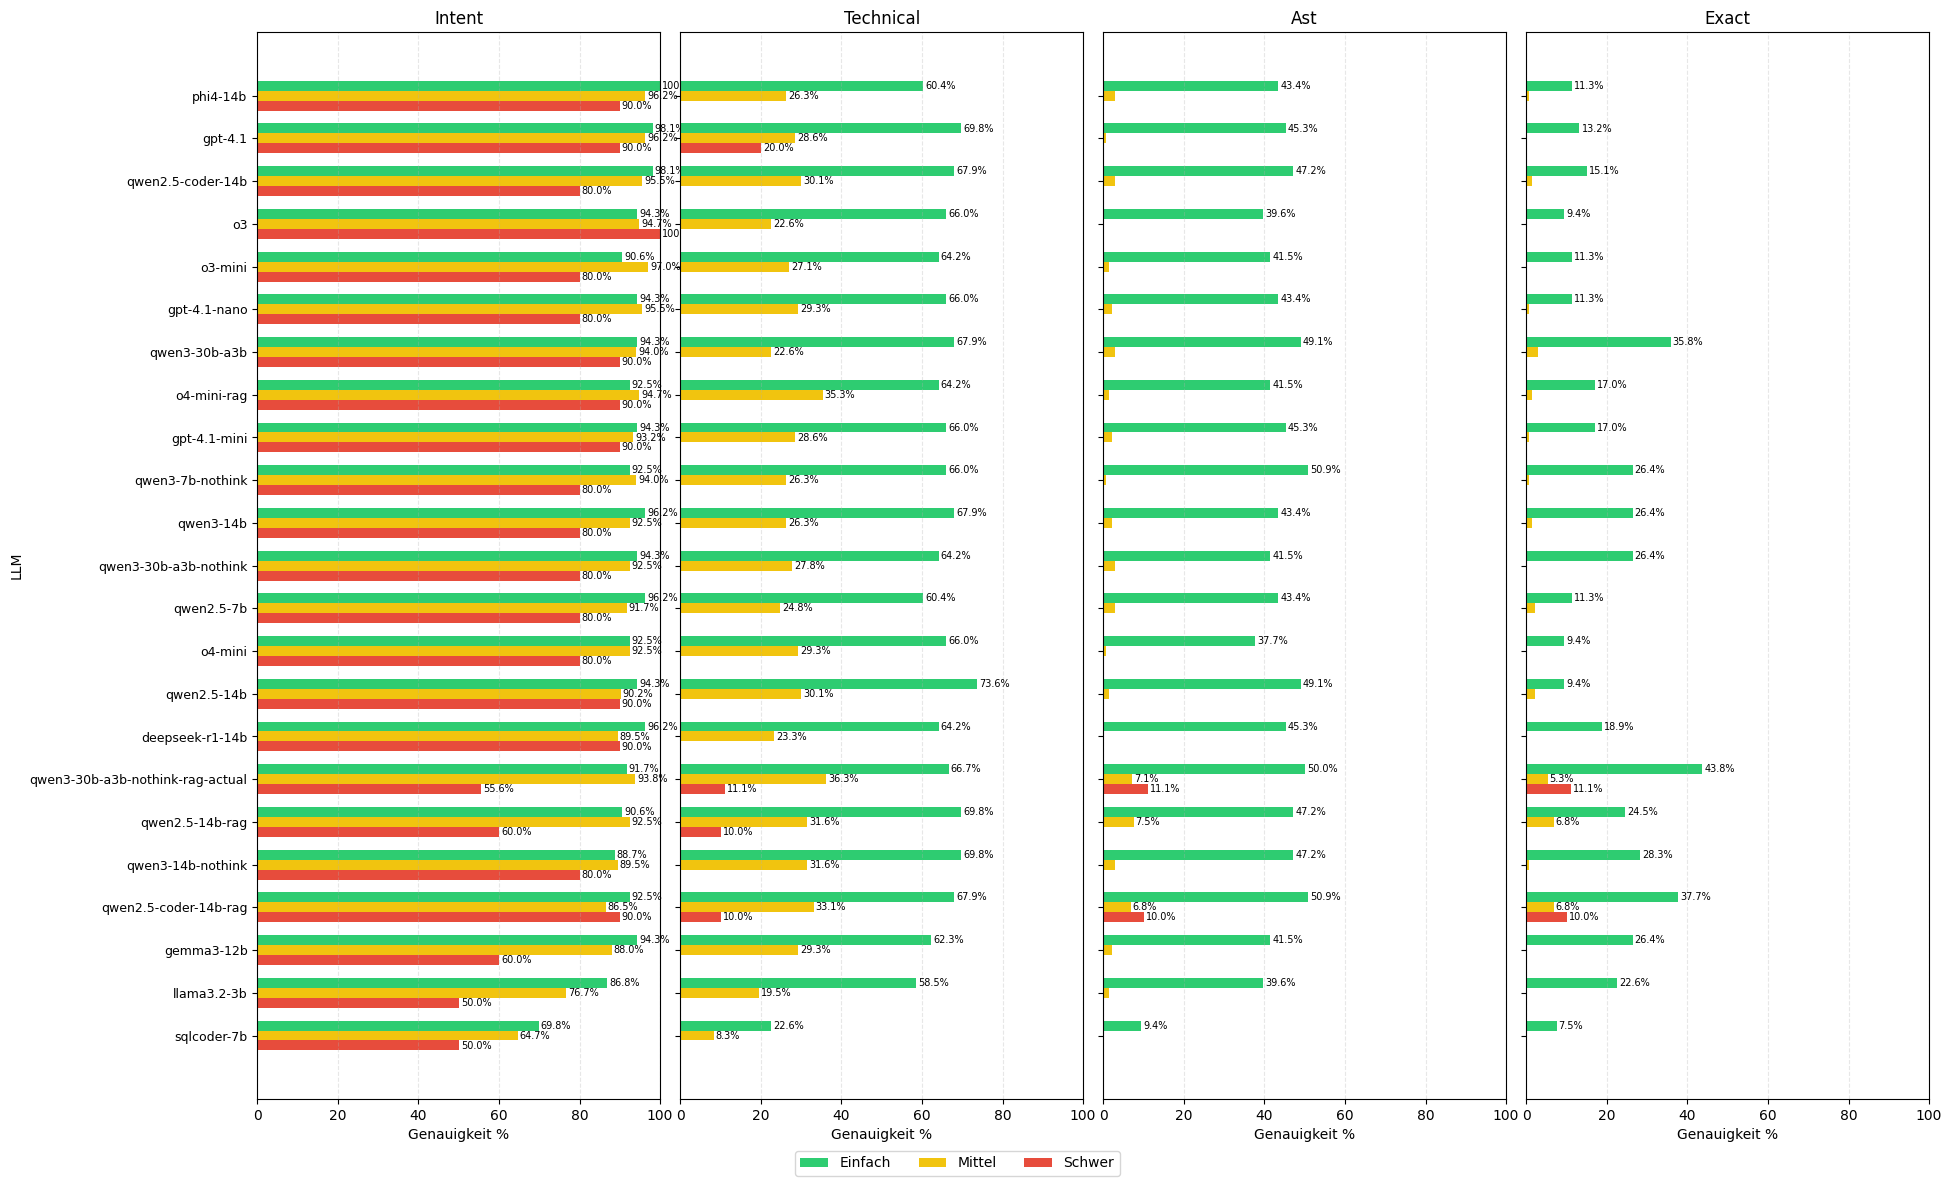

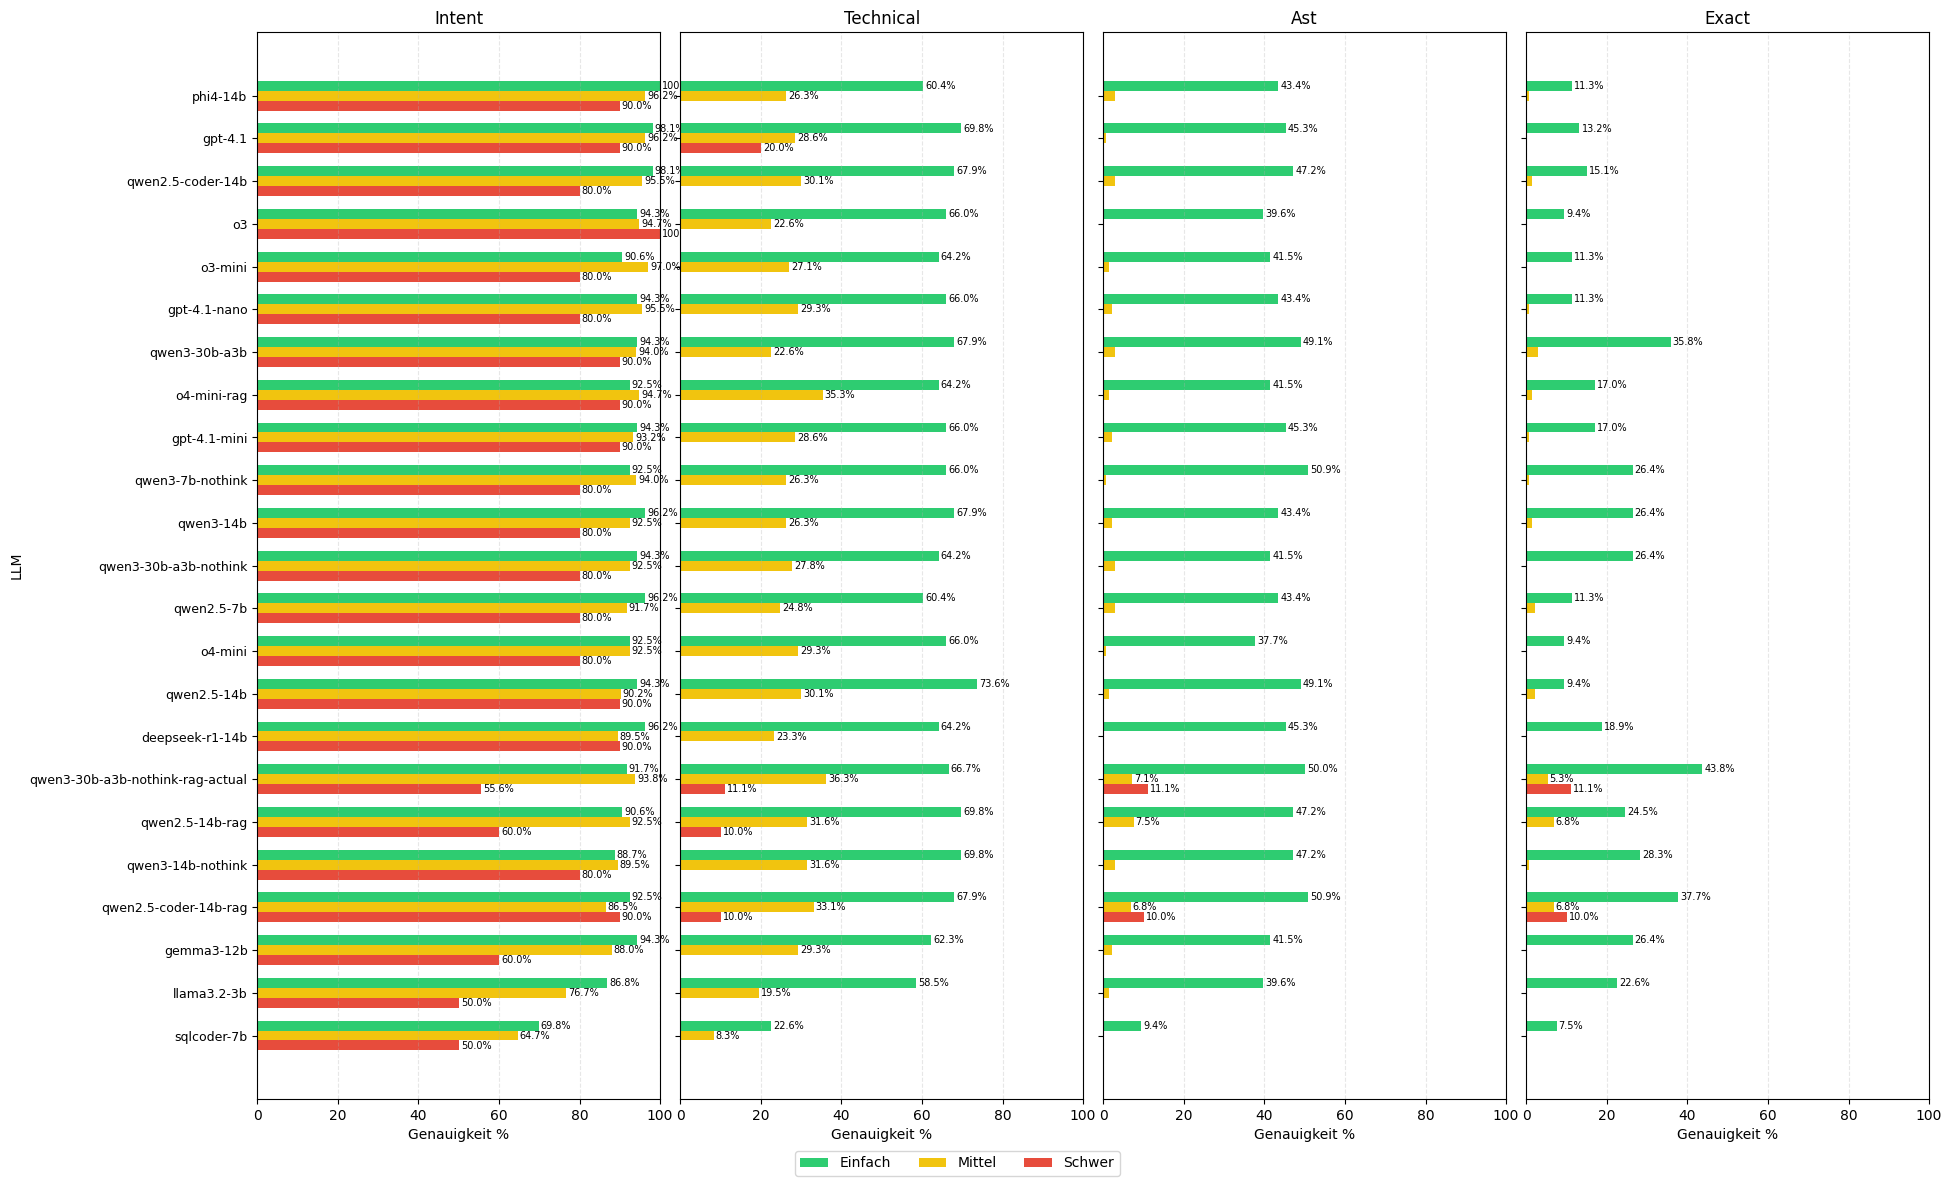

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np
# from typing import Dict

# def plot_all_metrics_horizontal_grouped(metrics_dict: Dict[str, "LLMResultMetrics"]) -> None:
#     """
#     Erstellt einen Plot mit 4 nebeneinander angeordneten Subplots für alle Metriken,
#     wobei jeder Balken nach Schwierigkeitsgraden (easy, medium, hard) aufgeteilt ist.
#     """
#     # Metriken in der gewünschten Reihenfolge
#     metrics_order = [
#         "accuracy_judge_intent",
#         "accuracy_judge_technical", 
#         "accuracy_ast", 
#         "accuracy_exact"
#     ]
    
#     # Kurze Titel für die Metriken
#     metric_titles = {
#         "accuracy_judge_intent": "Intent",
#         "accuracy_judge_technical": "Technical",
#         "accuracy_ast": "Ast",
#         "accuracy_exact": "Exact"
#     }
    
#     COLOR_SCHEME = {
#         "intent": "#2ecc71",    # Grün
#         "technical": "#3498db", # Blau
#         "ast": "#e74c3c",       # Rot
#         "exact": "#f1c40f",     # Gelb
#         "easy": "#2ecc71",      # Grün
#         "medium": "#f1c40f",    # Gelb
#         "hard": "#e74c3c",      # Rot
#     }
    
#     # Sammle alle Modellnamen und sortiere nach Intent-Metrik
#     all_models = []
#     for name, m in metrics_dict.items():
#         intent_fn = getattr(m, "accuracy_judge_intent")
#         all_models.append((m.model_name, intent_fn()))
    
#     # Sortiere Modelle nach Intent-Genauigkeit (absteigend)
#     all_models.sort(key=lambda x: x[1], reverse=True)
#     model_order = [m[0] for m in all_models]
    
#     # Figur erstellen - mehr Platz für die Modellnamen
#     fig, axes = plt.subplots(1, 4, figsize=(20, 12), sharey=True)
    
#     # Y-Position für alle Modelle
#     y_pos = np.arange(len(model_order))
    
#     # Für jede Metrik einen Subplot erstellen
#     for i, metric_fn_name in enumerate(metrics_order):
#         ax = axes[i]
        
#         # Daten für easy, medium und hard sammeln
#         easy_values = []
#         medium_values = []
#         hard_values = []
        
#         for model_name in model_order:
#             m = next(m for name, m in metrics_dict.items() if m.model_name == model_name)
#             fn = getattr(m, metric_fn_name)
#             easy_values.append(fn("easy") * 100)
#             medium_values.append(fn("medium") * 100)
#             hard_values.append(fn("hard") * 100)
        
#         # Balken für jeden Schwierigkeitsgrad zeichnen
#         bar_height = 0.7
#         small_bar_height = bar_height / 3
        
#         # Hard (unten)
#         hard_bars = ax.barh(y_pos - small_bar_height, hard_values, 
#                            color=COLOR_SCHEME["hard"], 
#                            height=small_bar_height, 
#                            label="Schwer")
        
#         # Medium (mitte)
#         medium_bars = ax.barh(y_pos, medium_values, 
#                              color=COLOR_SCHEME["medium"], 
#                              height=small_bar_height, 
#                              label="Mittel")
        
#         # Easy (oben)
#         easy_bars = ax.barh(y_pos + small_bar_height, easy_values, 
#                            color=COLOR_SCHEME["easy"], 
#                            height=small_bar_height, 
#                            label="Einfach")
        
#         # Werte an den Balken anzeigen - nur wenn sie größer als ein Schwellwert sind
#         threshold = 5.0  # Nur Werte > 5% anzeigen
        
#         for j in range(len(y_pos)):
#             # Hard
#             if hard_values[j] > threshold:
#                 ax.text(hard_values[j] + 0.5, y_pos[j] - small_bar_height, 
#                        f"{hard_values[j]:.1f}%", va='center', fontsize=7)
#             # Medium
#             if medium_values[j] > threshold:
#                 ax.text(medium_values[j] + 0.5, y_pos[j], 
#                        f"{medium_values[j]:.1f}%", va='center', fontsize=7)
#             # Easy
#             if easy_values[j] > threshold:
#                 ax.text(easy_values[j] + 0.5, y_pos[j] + small_bar_height, 
#                        f"{easy_values[j]:.1f}%", va='center', fontsize=7)
        
#         # Achsen & Beschriftungen
#         ax.set_title(metric_titles[metric_fn_name], fontsize=12)
#         ax.set_xlim(0, 100)
#         ax.set_xlabel("Genauigkeit %", fontsize=10)
        
#         # Gitter nur für x-Achse
#         ax.grid(axis='x', linestyle='--', alpha=0.3)
        
#         # # Y-Achsenbeschriftung nur beim ersten Subplot
#         # if i == 0:
#         #     ax.set_yticks(y_pos)
#         #     # Mehr Platz für die Modellnamen
#         #     plt.subplots_adjust(left=0.15)  # Mehr Platz links
#         #     ax.set_yticklabels(model_order, fontsize=9)
#         #     ax.set_ylabel("LLM", fontsize=10)
#         # else:
#         #     ax.set_yticks(y_pos)
#         #     ax.set_yticklabels([])
#         if i == 0:
#             ax.set_yticks(y_pos)
#             ax.set_yticklabels(model_order, fontsize=9)
#             ax.set_ylabel("LLM", fontsize=10)
#         else:
#             # keine Änderung an den (geteilten) Labels vornehmen!
#             ax.tick_params(axis="y", labelleft=False)   # nur ausblenden
    
#     # Gemeinsame Legende unten
#     fig.legend(
#         [easy_bars, medium_bars, hard_bars],
#         ["Einfach", "Mittel", "Schwer"],
#         loc='lower center',
#         ncol=3,
#         bbox_to_anchor=(0.5, 0.01),
#         fontsize=10
#     )
    
#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0.05, bottom=0.08, left=0.15)
    
#     return fig

# # Beispielaufruf:
# # fig = plot_all_metrics_horizontal_grouped(metrics_dict)
# # plt.show()
plot_all_metrics_horizontal_grouped(metrics)

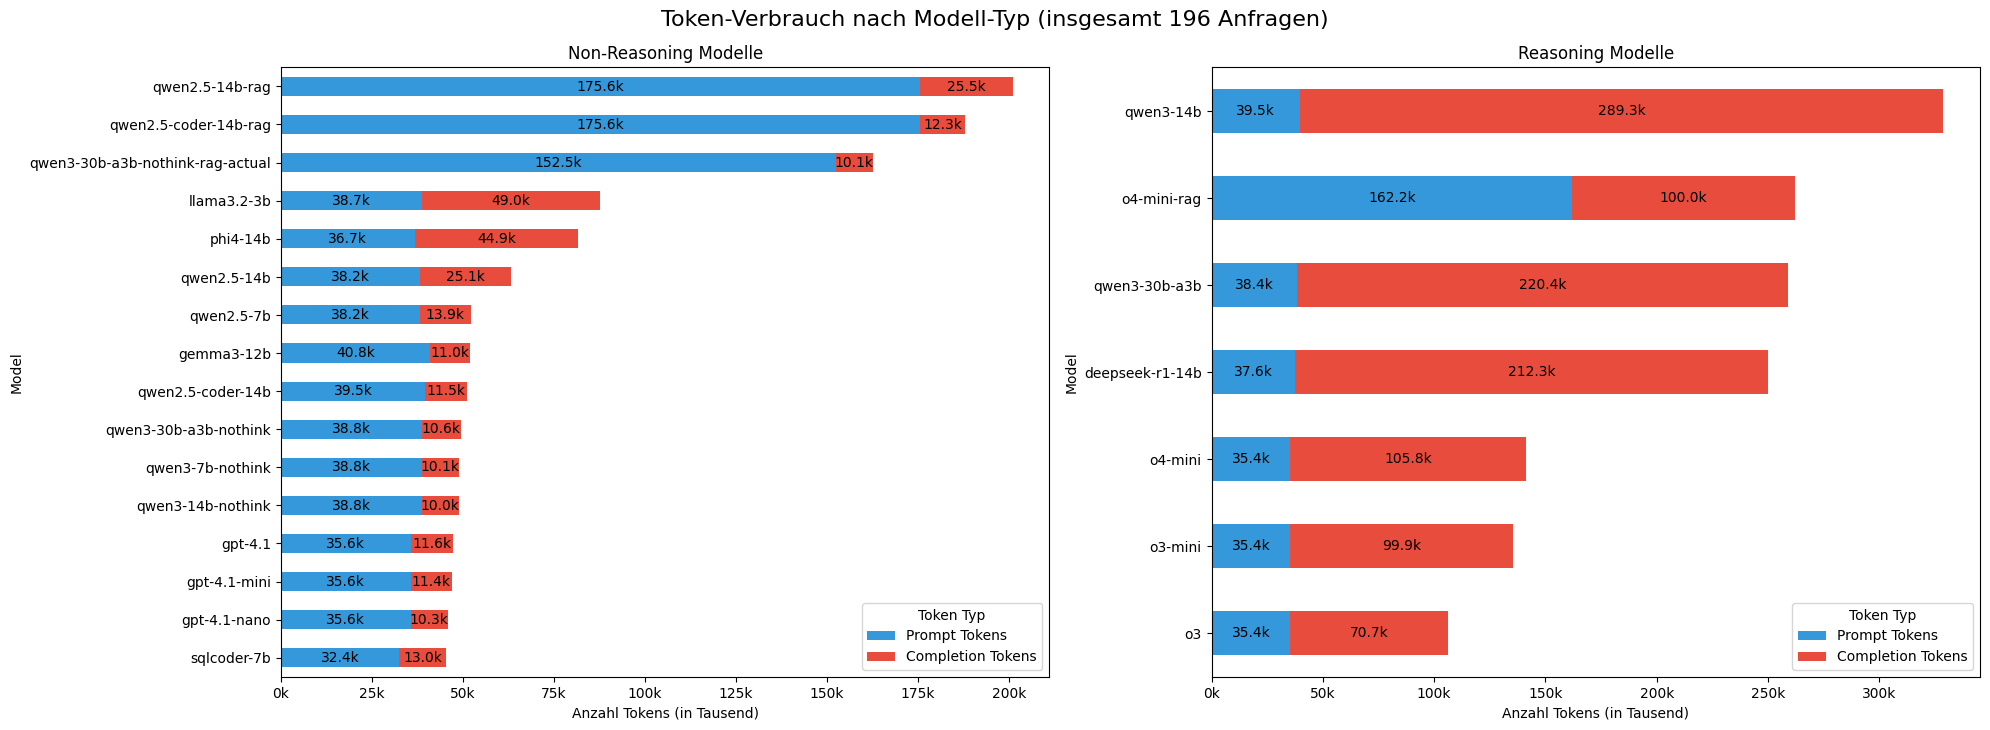

In [6]:
plot_token_usage(metrics)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


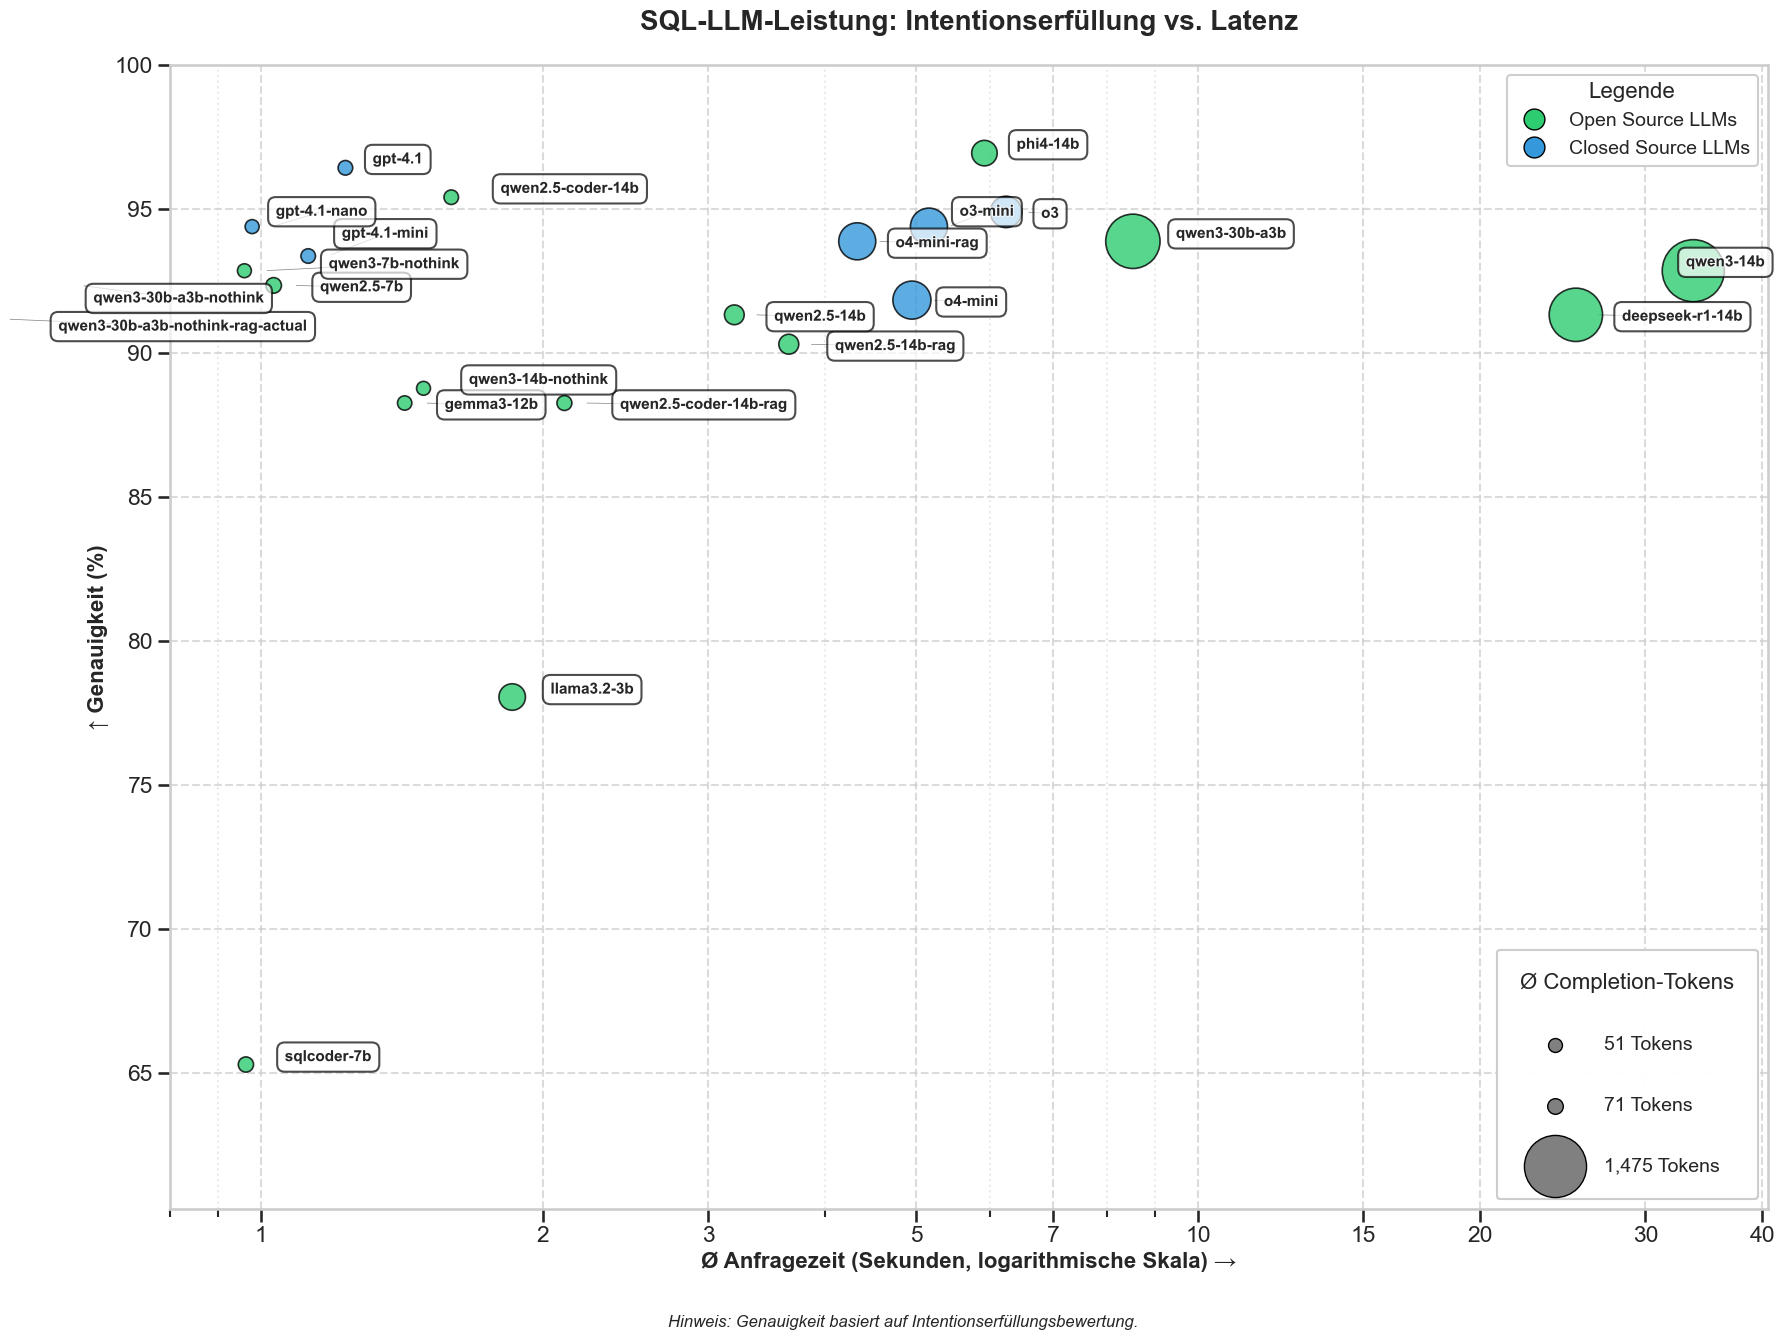

In [7]:
plot_model_comparison(metrics, accuracy_metric='intent',)

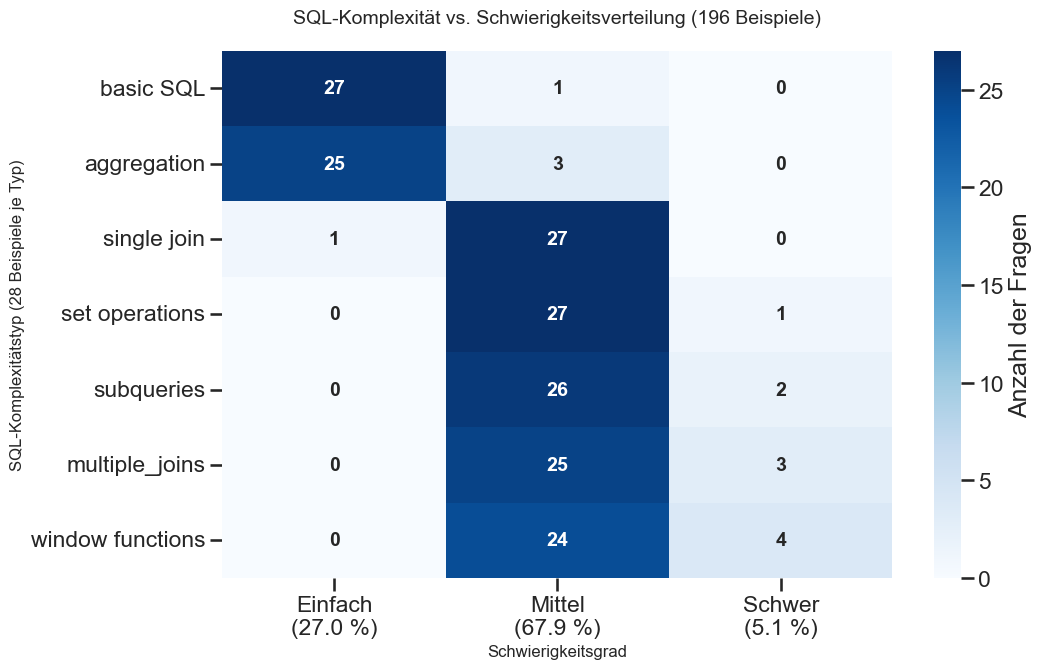

In [8]:
plot_complexity_heatmap(metrics, complexity_map)

/Users/daniel/projects/text2sql_eval/text2sql_lib/viz_toolbox.py:1550: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(left=0.0, right=max_time)


(<Figure size 1800x1400 with 1 Axes>,
 <Axes: title={'center': 'SQL Modell Performance Vergleich: Exact Accuracy vs. Latenz'}, xlabel='Ø Latenz (Sekunden, Log Skala)', ylabel='Accuracy (%)'>)

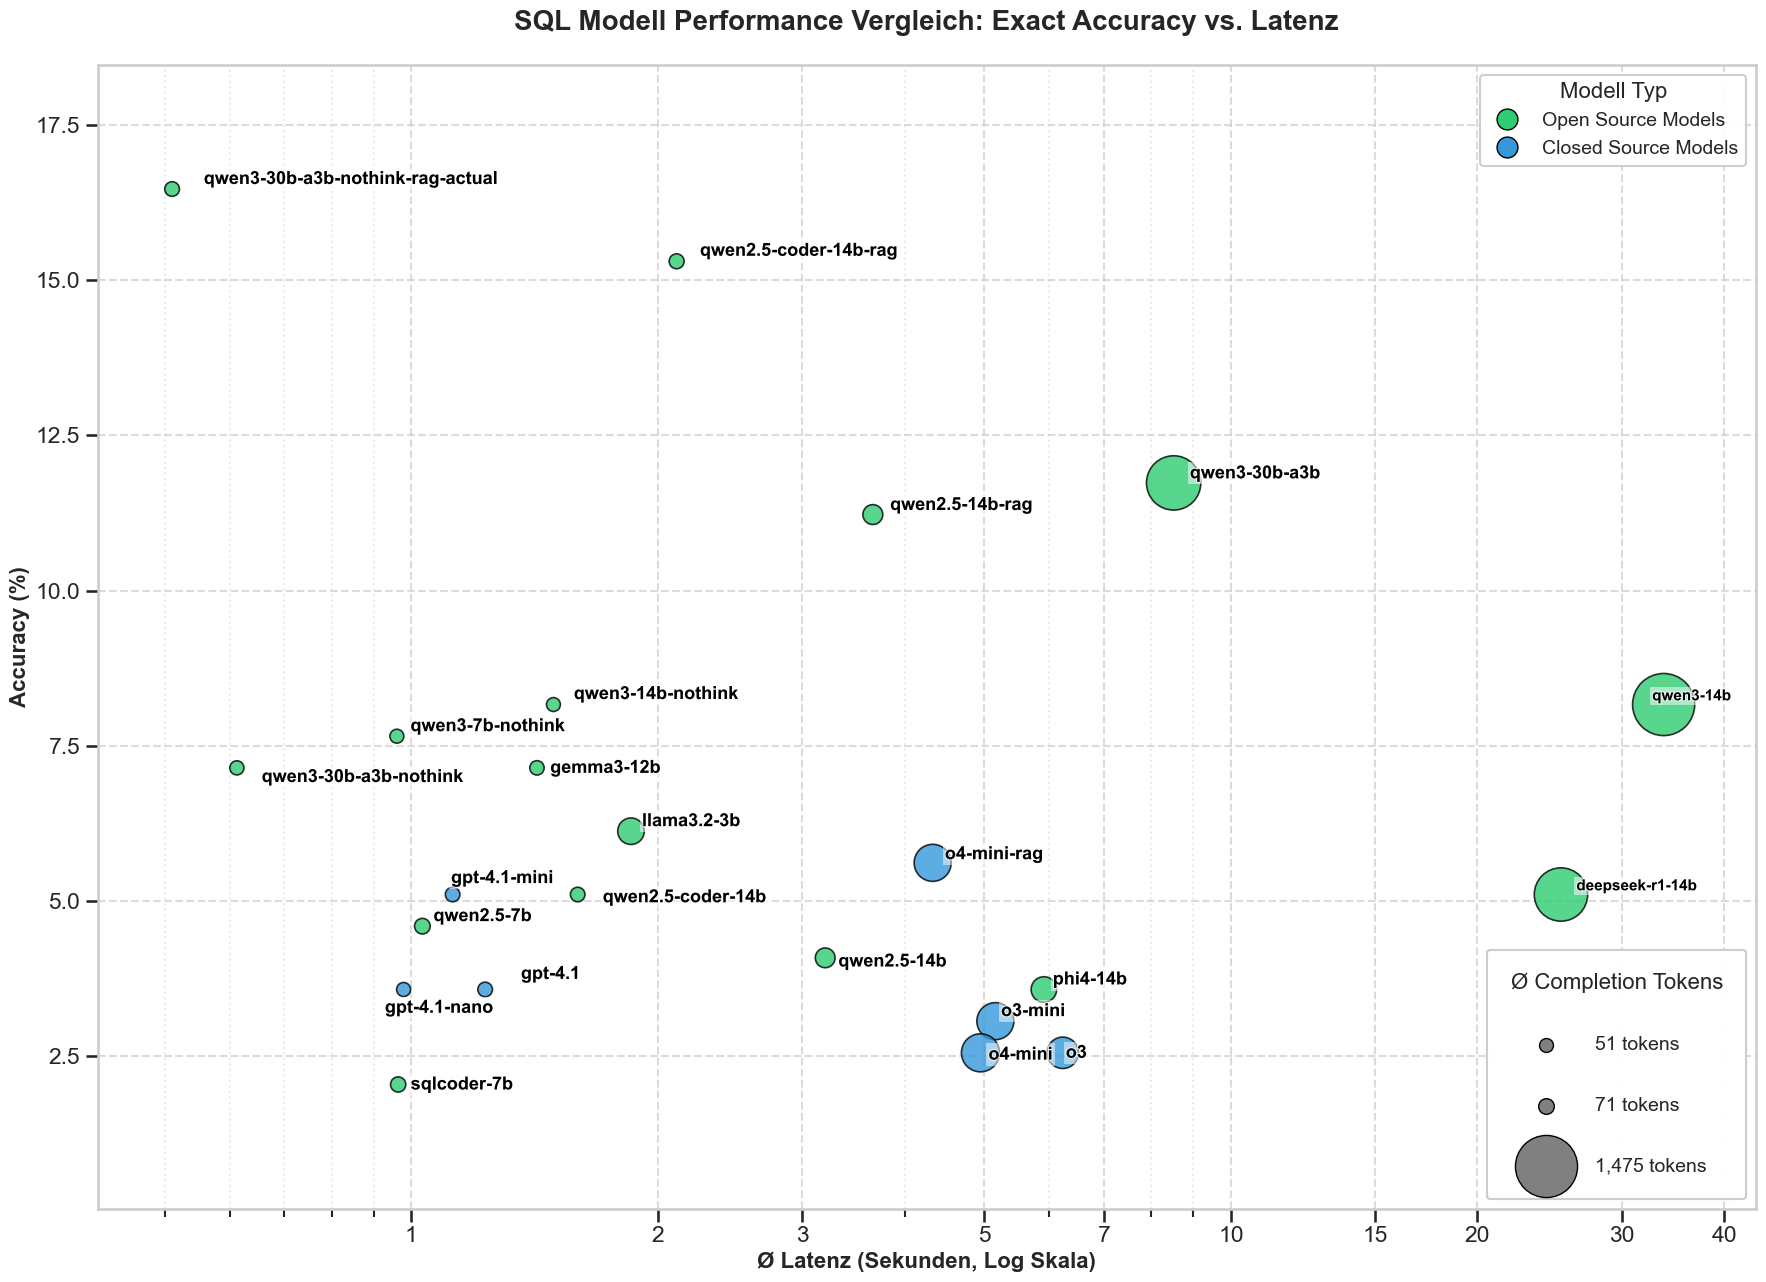

In [9]:
create_model_comparison_chart(metrics, accuracy_metric='Exact')

/Users/daniel/projects/text2sql_eval/text2sql_lib/viz_toolbox.py:1550: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(left=0.0, right=max_time)


(<Figure size 1800x1400 with 1 Axes>,
 <Axes: title={'center': 'SQL Modell Performance Vergleich: Intent Accuracy vs. Latenz'}, xlabel='Ø Latenz (Sekunden, Log Skala)', ylabel='Accuracy (%)'>)

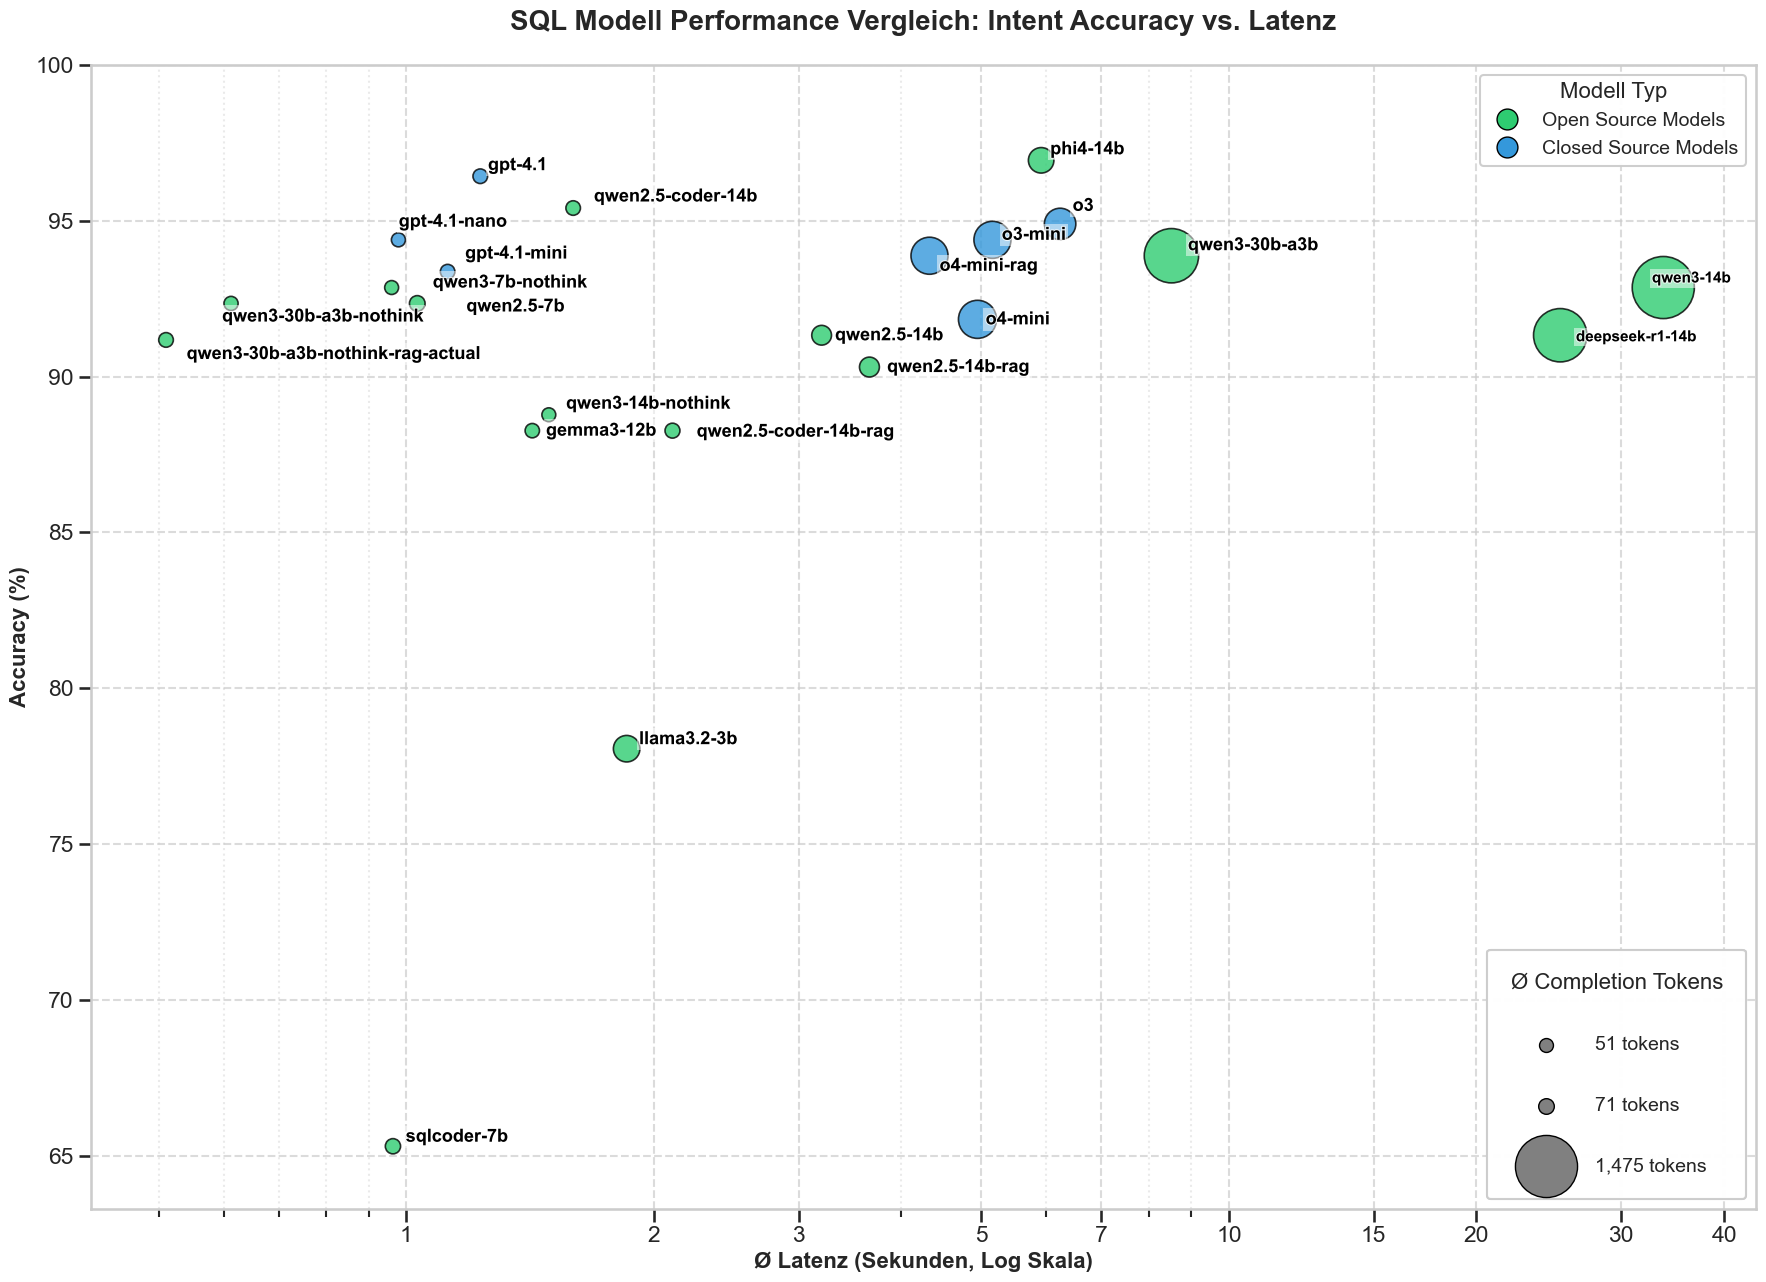

In [10]:
create_model_comparison_chart(metrics, accuracy_metric='intent')

Generating plots for 'qwen2.5-coder-14b-rag' vs 'qwen2.5-coder-14b'...


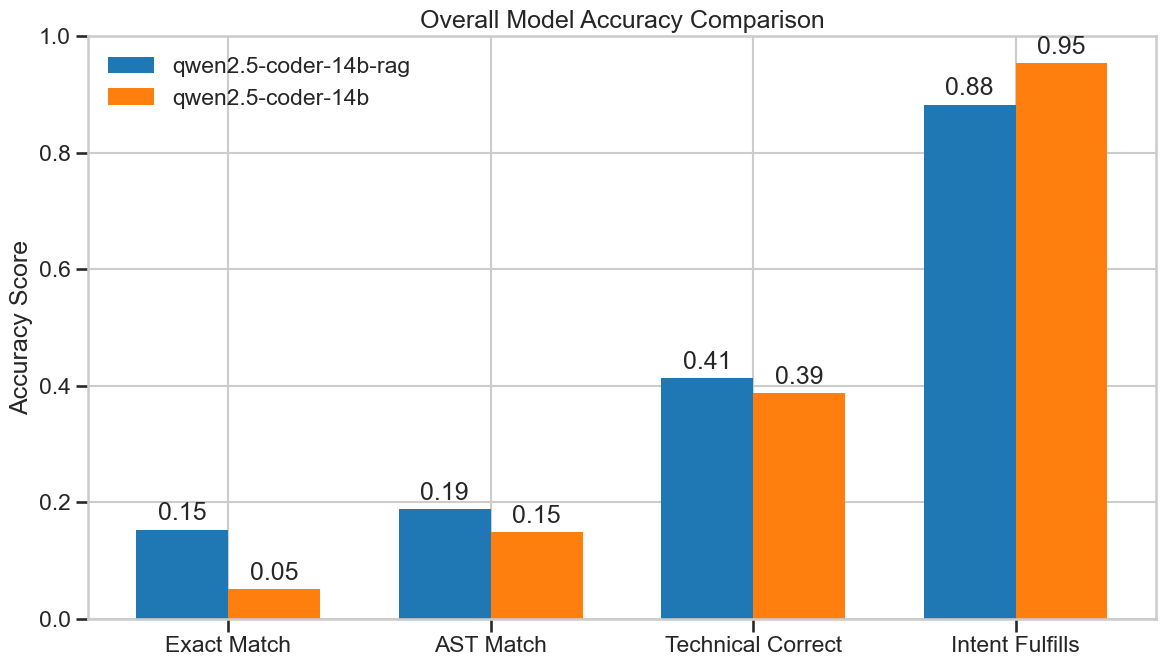

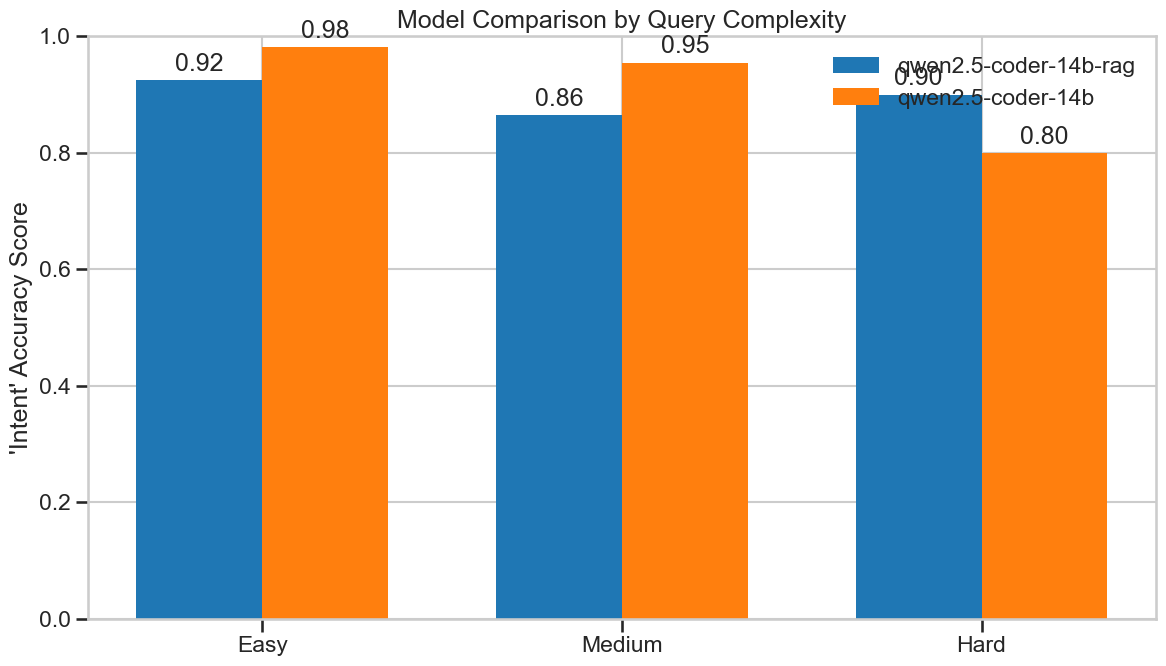

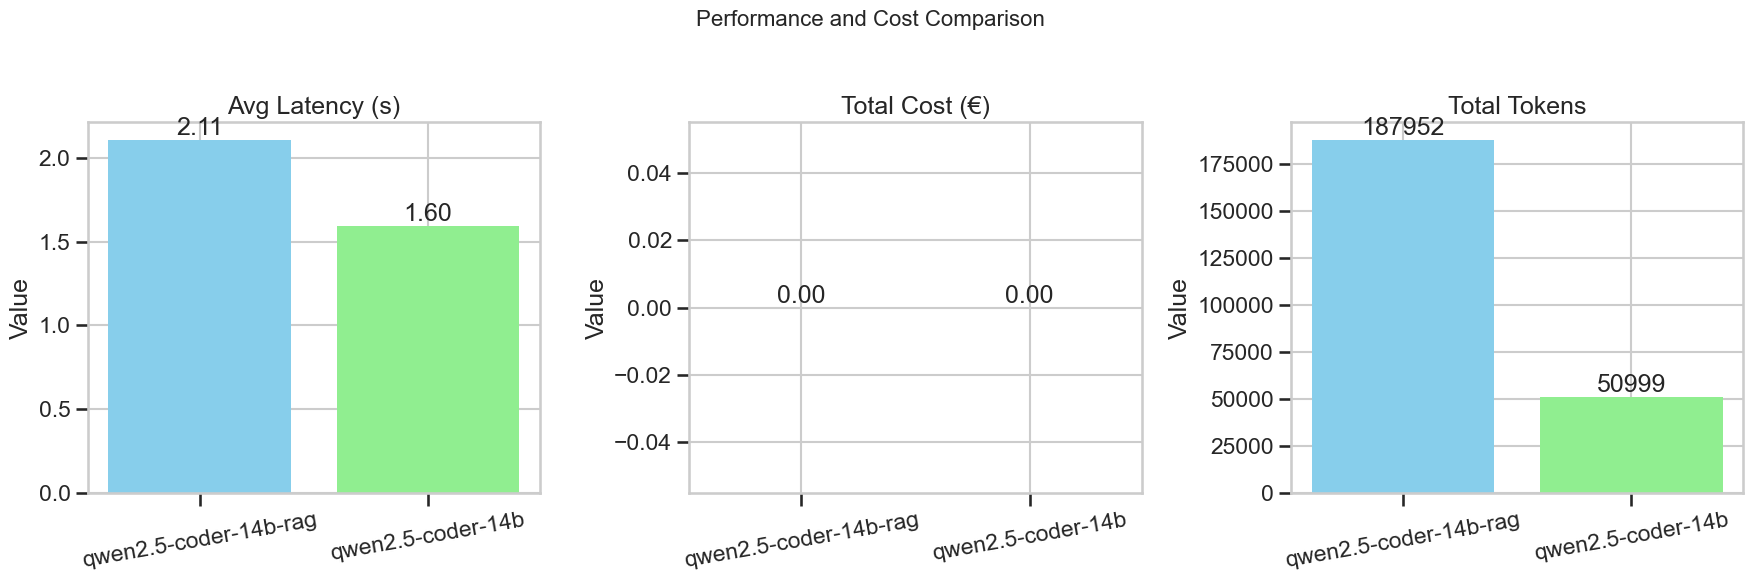

In [11]:
from typing import Literal


def plot_accuracy_comparison(model1_metrics: LLMResultMetrics, model2_metrics: LLMResultMetrics):
    """
    Generates a grouped bar chart comparing the primary accuracy metrics of two models.
    """
    labels = ["Exact Match", "AST Match", "Technical Correct", "Intent Fulfills"]
    model1_scores = [
        model1_metrics.accuracy_exact(),
        model1_metrics.accuracy_ast(),
        model1_metrics.accuracy_judge_technical(),
        model1_metrics.accuracy_judge_intent(),
    ]
    model2_scores = [
        model2_metrics.accuracy_exact(),
        model2_metrics.accuracy_ast(),
        model2_metrics.accuracy_judge_technical(),
        model2_metrics.accuracy_judge_intent(),
    ]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width/2, model1_scores, width, label=model1_metrics.model_name)
    rects2 = ax.bar(x + width/2, model2_scores, width, label=model2_metrics.model_name)

    # Add some text for labels, title and axes ticks
    ax.set_ylabel('Accuracy Score')
    ax.set_title('Overall Model Accuracy Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)  # Accuracy is between 0 and 1
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')

    fig.tight_layout()
    plt.show()


def plot_complexity_comparison(
    model1_metrics: LLMResultMetrics,
    model2_metrics: LLMResultMetrics,
    accuracy_type: Literal["exact", "ast", "technical", "intent"] = "intent"
):
    """
    Compares a single accuracy metric across complexity buckets (easy, medium, hard).
    """
    buckets = ["easy", "medium", "hard"]
    
    # Map the user-friendly name to the actual method name
    accuracy_methods = {
        "exact": "accuracy_exact",
        "ast": "accuracy_ast",
        "technical": "accuracy_judge_technical",
        "intent": "accuracy_judge_intent",
    }
    method_name = accuracy_methods[accuracy_type]

    model1_scores = [getattr(model1_metrics, method_name)(bucket=b) for b in buckets]
    model2_scores = [getattr(model2_metrics, method_name)(bucket=b) for b in buckets]

    x = np.arange(len(buckets))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width/2, model1_scores, width, label=model1_metrics.model_name)
    rects2 = ax.bar(x + width/2, model2_scores, width, label=model2_metrics.model_name)

    ax.set_ylabel(f"'{accuracy_type.title()}' Accuracy Score")
    ax.set_title(f"Model Comparison by Query Complexity")
    ax.set_xticks(x)
    ax.set_xticklabels([b.capitalize() for b in buckets])
    ax.set_ylim(0, 1)
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')

    fig.tight_layout()
    plt.show()

def plot_scalar_metrics_comparison(model1_metrics: LLMResultMetrics, model2_metrics: LLMResultMetrics):
    """
    Compares scalar metrics like latency, cost, and tokens in separate subplots.
    """
    scalar_metrics = {
        "Avg Latency (s)": (model1_metrics.avg_latency_sec, model2_metrics.avg_latency_sec),
        "Total Cost (€)": (model1_metrics.cost_eur, model2_metrics.cost_eur),
        "Total Tokens": (model1_metrics.total_tokens, model2_metrics.total_tokens),
    }
    
    model_names = [model1_metrics.model_name, model2_metrics.model_name]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Performance and Cost Comparison', fontsize=16)

    for ax, (title, values) in zip(axes, scalar_metrics.items()):
        bars = ax.bar(model_names, values, color=['skyblue', 'lightgreen'])
        ax.set_title(title)
        ax.set_ylabel('Value')
        ax.bar_label(bars, fmt='%.2f' if title != 'Total Tokens' else '%d')
        ax.tick_params(axis='x', rotation=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
    plt.show()


# --------------------------------------------------------------------------- #
# EXAMPLE USAGE
# --------------------------------------------------------------------------- #
if __name__ == "__main__":
    # --- IMPORTANT ---
    # Replace these with the actual keys from your `metrics` dictionary
    # that you want to compare.
    MODEL_1_KEY = "qwen2_5_14b_rag"
    MODEL_2_KEY = "qwen2_5_14b"
    MODEL_1_KEY = "qwen2_5_coder_14b_rag"
    MODEL_2_KEY = "qwen2_5_coder_14b"
    
    # Check if the chosen models exist in the metrics dictionary
    if MODEL_1_KEY not in metrics or MODEL_2_KEY not in metrics:
        print(f"Error: Make sure '{MODEL_1_KEY}' and '{MODEL_2_KEY}' exist in the `metrics` dict.")
        print(f"Available models: {list(metrics.keys())}")
    else:
        model1 = metrics[MODEL_1_KEY]
        model2 = metrics[MODEL_2_KEY]

        print(f"Generating plots for '{model1.model_name}' vs '{model2.model_name}'...")

        # Plot 1: Overall Accuracy
        plot_accuracy_comparison(model1, model2)

        # Plot 2: Intent Accuracy by Complexity
        # You can change the accuracy_type to "exact", "ast", or "technical"
        plot_complexity_comparison(model1, model2, accuracy_type="intent")
        
        # Plot 3: Cost, Latency, and Token Usage
        plot_scalar_metrics_comparison(model1, model2)


Generating plots for 'qwen2.5-14b-rag' vs 'qwen2.5-14b'...


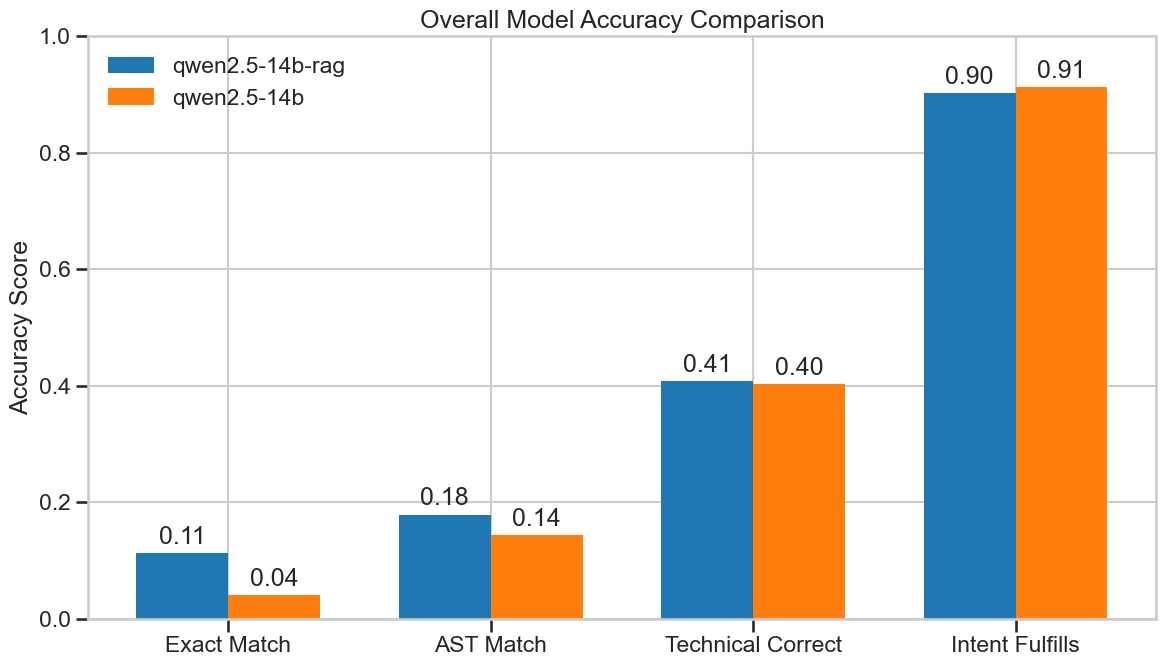

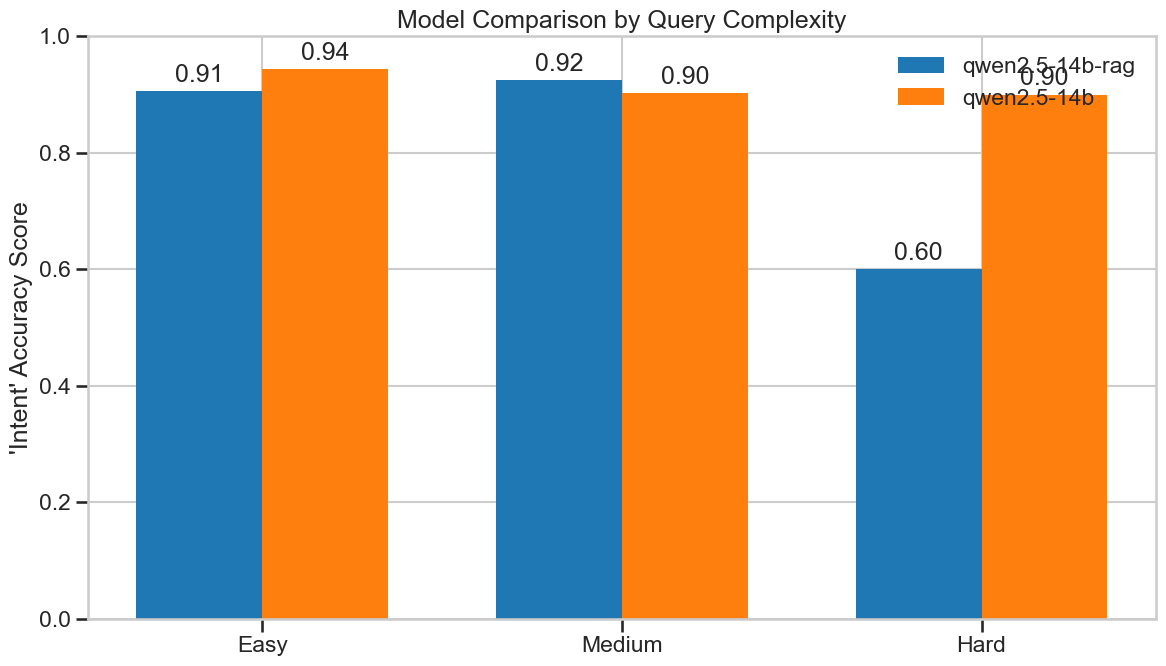

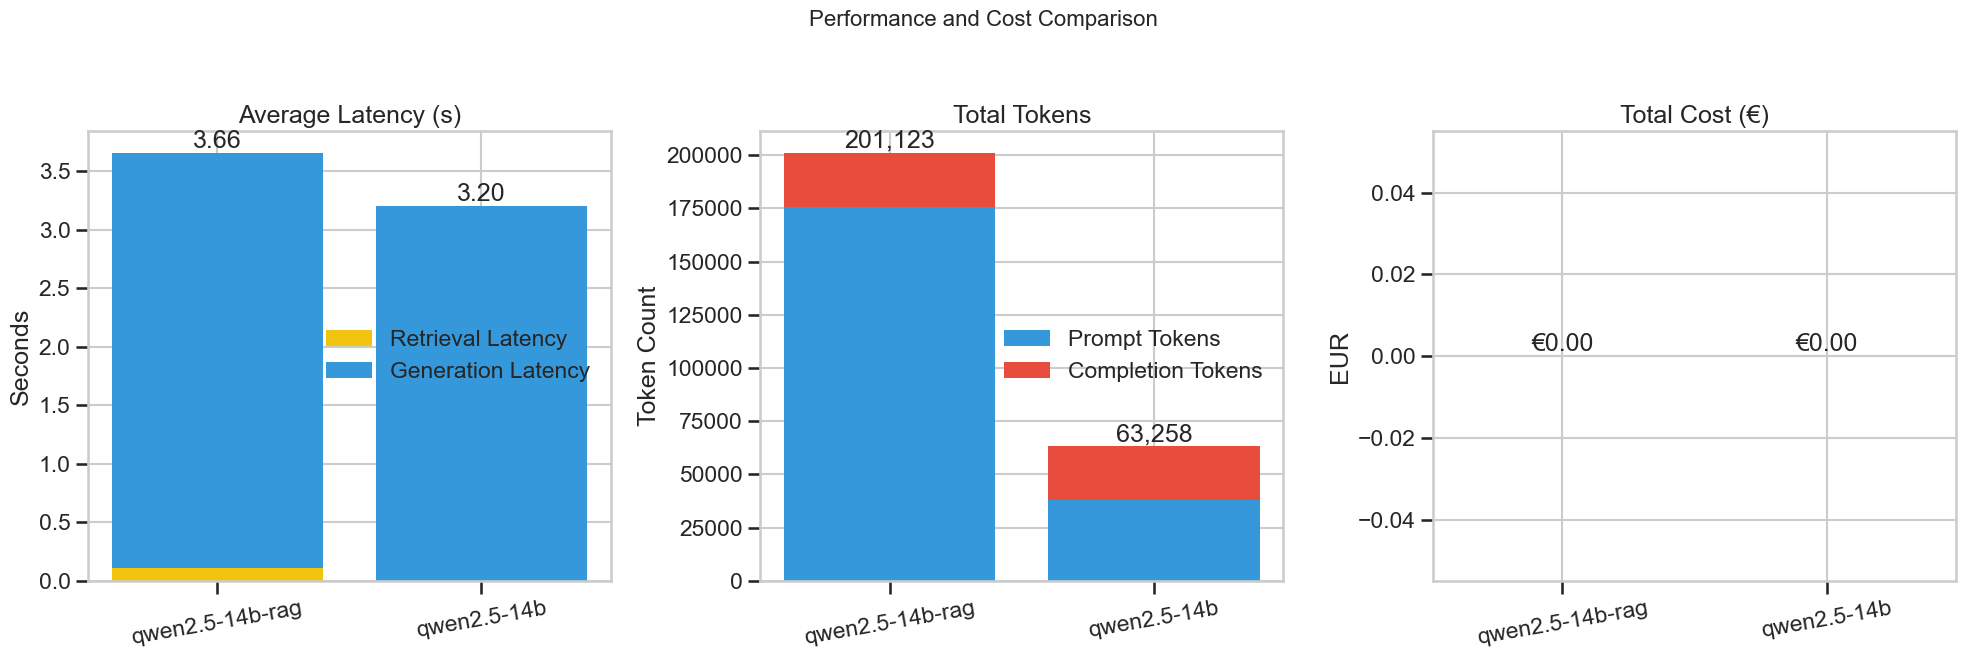

In [ ]:
def plot_scalar_metrics_comparison(model1_metrics: LLMResultMetrics, model2_metrics: LLMResultMetrics):
    """Compares scalar metrics like latency, tokens, and cost in separate subplots."""
    model_names = [model1_metrics.model_name, model2_metrics.model_name]
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    fig.suptitle('Performance and Cost Comparison', fontsize=16)

    # --- 1. Latency (Stacked Bar) ---
    ax1 = axes[0]
    ret_latencies = [m.retrieval_latency_sec for m in (model1_metrics, model2_metrics)]
    gen_latencies = [m.generation_latency_sec for m in (model1_metrics, model2_metrics)]
    
    ax1.bar(model_names, ret_latencies, label='Retrieval Latency', color=COLOR_SCHEME['secondary'])
    ax1.bar(model_names, gen_latencies, bottom=ret_latencies, label='Generation Latency', color=COLOR_SCHEME['primary'])
    
    ax1.set_title('Average Latency (s)')
    ax1.set_ylabel('Seconds')
    ax1.legend()
    # Add total latency labels on top of the stacked bars
    totals = [m.avg_latency_sec for m in (model1_metrics, model2_metrics)]
    for i, total in enumerate(totals):
        ax1.text(i, total, f'{total:.2f}', ha='center', va='bottom')

    # --- 2. Tokens (Stacked Bar) ---
    ax2 = axes[1]
    prompt_tokens = [m.total_prompt_tokens for m in (model1_metrics, model2_metrics)]
    comp_tokens = [m.total_completion_tokens for m in (model1_metrics, model2_metrics)]

    ax2.bar(model_names, prompt_tokens, label='Prompt Tokens', color=COLOR_SCHEME['prompt_tokens'])
    ax2.bar(model_names, comp_tokens, bottom=prompt_tokens, label='Completion Tokens', color=COLOR_SCHEME['completion_tokens'])

    ax2.set_title('Total Tokens')
    ax2.set_ylabel('Token Count')
    ax2.legend()
    totals = [m.total_tokens for m in (model1_metrics, model2_metrics)]
    for i, total in enumerate(totals):
        ax2.text(i, total, f'{total:,}', ha='center', va='bottom')

    # --- 3. Cost (Simple Bar) ---
    ax3 = axes[2]
    costs = [m.cost_eur for m in (model1_metrics, model2_metrics)]
    bars = ax3.bar(model_names, costs, color=COLOR_SCHEME['tertiary'])
    ax3.set_title('Total Cost (€)')
    ax3.set_ylabel('EUR')
    ax3.bar_label(bars, fmt='€%.2f')

    # General adjustments
    for ax in axes:
        ax.tick_params(axis='x', rotation=10)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    # --- IMPORTANT ---
    # Replace these with the actual keys from your `metrics` dictionary
    # that you want to compare.
    MODEL_1_KEY = "qwen2_5_14b_rag"
    MODEL_2_KEY = "qwen2_5_14b"
    # MODEL_1_KEY = "qwen2_5_coder_14b_rag"
    # MODEL_2_KEY = "qwen2_5_coder_14b"
    # MODEL_1_KEY = "o4_mini_rag"
    # MODEL_2_KEY = "o4_mini"
    
    # Check if the chosen models exist in the metrics dictionary
    if MODEL_1_KEY not in metrics or MODEL_2_KEY not in metrics:
        print(f"Error: Make sure '{MODEL_1_KEY}' and '{MODEL_2_KEY}' exist in the `metrics` dict.")
        print(f"Available models: {list(metrics.keys())}")
    else:
        model1 = metrics[MODEL_1_KEY]
        model2 = metrics[MODEL_2_KEY]

        print(f"Generating plots for '{model1.model_name}' vs '{model2.model_name}'...")

        # Plot 1: Overall Accuracy
        plot_accuracy_comparison(model1, model2)

        # Plot 2: Intent Accuracy by Complexity
        # You can change the accuracy_type to "exact", "ast", or "technical"
        plot_complexity_comparison(model1, model2, accuracy_type="intent")
        
        # Plot 3: Cost, Latency, and Token Usage
        plot_scalar_metrics_comparison(model1, model2)
